Index([u'userid', u'age', u'dob_day', u'dob_year', u'dob_month', u'gender',
       u'tenure', u'friend_count', u'friendships_initiated', u'likes',
       u'likes_received', u'mobile_likes', u'mobile_likes_received',
       u'www_likes', u'www_likes_received'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_lik

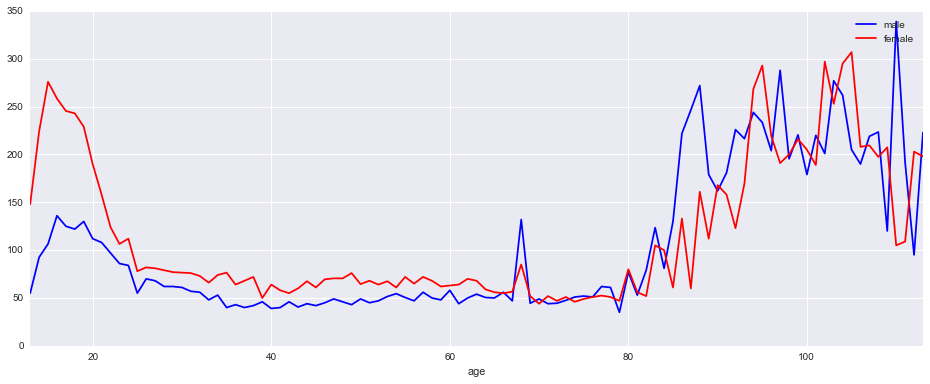

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *
from ggplot import diamonds
%matplotlib inline

df = pd.read_csv('data/pseudo_facebook.tsv', sep='\t')
print df.columns
print df.info()
print df.head()

avg_series = df['friend_count'].groupby([df['age'], df['gender']]).mean().reset_index()
print avg_series.head()
mdn_series = df['friend_count'].groupby([df['age'], df['gender']]).median().reset_index()
print mdn_series.head()
cnt_series = df['friend_count'].groupby([df['age'], df['gender']]).count().reset_index()
print cnt_series.head()

new_df = pd.DataFrame([avg_series,mdn_series,cnt_series])
new_df.head()

new_df = df.join(df.groupby(['age','gender'])['friend_count'].mean(), on=['age','gender'], rsuffix='_mean')
new_df = new_df.join(df.groupby(['age','gender'])['friend_count'].median(), on=['age','gender'], rsuffix='_median')
new_df = new_df.join(df.groupby(['age','gender'])['friend_count'].count(), on=['age','gender'], rsuffix='_count')
new_df = new_df[['age','gender','friend_count_mean','friend_count_median','friend_count_count']]
new_df.drop_duplicates(inplace=True)
new_df.head()
new_df.sort(columns=['age'], inplace=True)

ax = new_df[new_df.gender ==   'male'].plot('age', 'friend_count_median', kind='line', label=  'male', figsize=(16,6), color='blue')
new_df[new_df.gender == 'female'].plot('age', 'friend_count_median', kind='line', label='female', figsize=(16,6), color='red',ax=ax)
plt.legend()
plt.show()